# Ethereum Illicit Accounts Dataset - Results
### <i>Experiment 1.1 - Boosting Algorithms vs Random Forest</i> 
<hr>

### Table of Contents
- [Benchmark Models](#benchmark) <br>
&emsp;- [Random Forest - Defualt Hyperparameters](#benchmark_rf_default) <br>
&emsp;&emsp;- [Evaluation Metrics](#benchmark_rf_default_eval) <br>
&emsp;&emsp;- [Evaluation Statistics](#benchmark_rf_default_stats) <br>
&emsp;&emsp;- [Confusion Matrix](#benchmark_rf_default_matrix) <br>
&emsp;&emsp;- [Feature Importance](#benchmark_rf_default_feats) <br>
&emsp;&emsp;- [Hyperparameters](#benchmark_rf_default_hyper) <br>

In [1]:
###### importing dependencies #############################################
import seaborn as sns
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import (
    results_table, 
    plot_metric_dist,
    plot_feature_imp,
    print_model_params, 
    plot_result_matrices,
    display_metrics_stats,
    elliptic_time_indexed_results
)

###### constants ##########################################################
N_features              = 15 # for feature importance N top/bottom
EXP_RESULT_PATH         = "persistence/experiment_1.1/results"

BENCHMARK_RESULTS       = "{}/{}".format(EXP_RESULT_PATH, "benchmark_model_results.pkl")
BENCHMARK_TUNED_RESULTS = "{}/{}".format(EXP_RESULT_PATH, "tuned_benchmark_results.pkl")
BENCHMARK_XGB_RESULTS   = "{}/{}".format(EXP_RESULT_PATH, "benchmark_xgb_model_results.pkl")

DEFAULT_RESULTS         = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")
TUNED_RESULTS           = "{}/{}".format(EXP_RESULT_PATH, "tuned_models_iter_results.pkl")

<a id='benchmark'></a>
## Benchmark Models 

<a id='benchmark_rf_default'></a>
### Random Forest - Default Hyperparameters 

In [2]:
benchmark_model = "random_forest"
benchmark_results = read_pickle(BENCHMARK_RESULTS)

<a id='benchmark_rf_default_eval'></a>
####  RF Default Hyperparameters - Evaluation Metrics
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [3]:
print("Performance metrics for RF benchmark model with default hyperparameters")
benchmark_metrics_df = results_table(benchmark_results)
display(benchmark_metrics_df)

Performance metrics for RF benchmark model with default hyperparameters


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_ALL,0.982,0.959,0.973,0.973,0.972,0.97


<a id='benchmark_rf_default_stats'></a>
#### RF Default Hyperparameters - Evaluation Statistics

<i>Note: Since random forest is non-deterministic in nature, we ran the model for 100 iterations and averaged the results. This was done to insure robustness and was also recommended in previous studies.<i/>
    
Below we show statistics for the evaluation metrics.

'random_forest' on 'ALL' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.981592,0.959205,0.972633,0.972633,0.971766,0.970264
std,29.011492,0.003166,0.003429,0.002261,0.002261,0.002288,0.002462
min,0.000000,0.973643,0.949541,0.966548,0.966548,0.965548,0.963594
25%,24.750000,0.979680,0.957187,0.971530,0.971530,0.970604,0.969040
50%,49.500000,0.981308,0.958716,0.972242,0.972242,0.971714,0.970000
75%,74.250000,0.984258,0.961774,0.973665,0.973665,0.972947,0.971451
max,99.000000,0.987500,0.967890,0.978648,0.978648,0.977854,0.976816


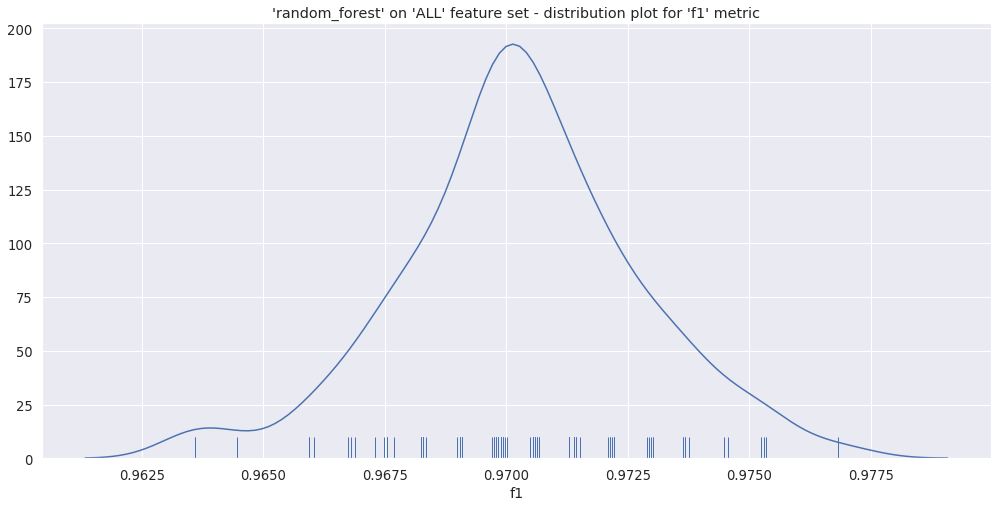

In [4]:
display_metrics_stats(benchmark_results)
plot_metric_dist(benchmark_results, "f1", figsize=(17,8))

<a id='benchmark_rf_default_matrix'></a>
####  RF Default Hyperparameters - Confusion Matrix

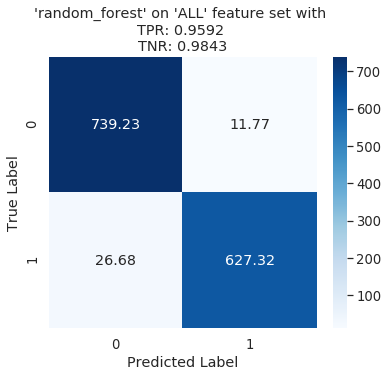

In [5]:
plot_result_matrices(benchmark_results, figsize=(6,5))

<a id='benchmark_rf_default_feats'></a>
####  RF Default Hyperparameters - Feature Importance 

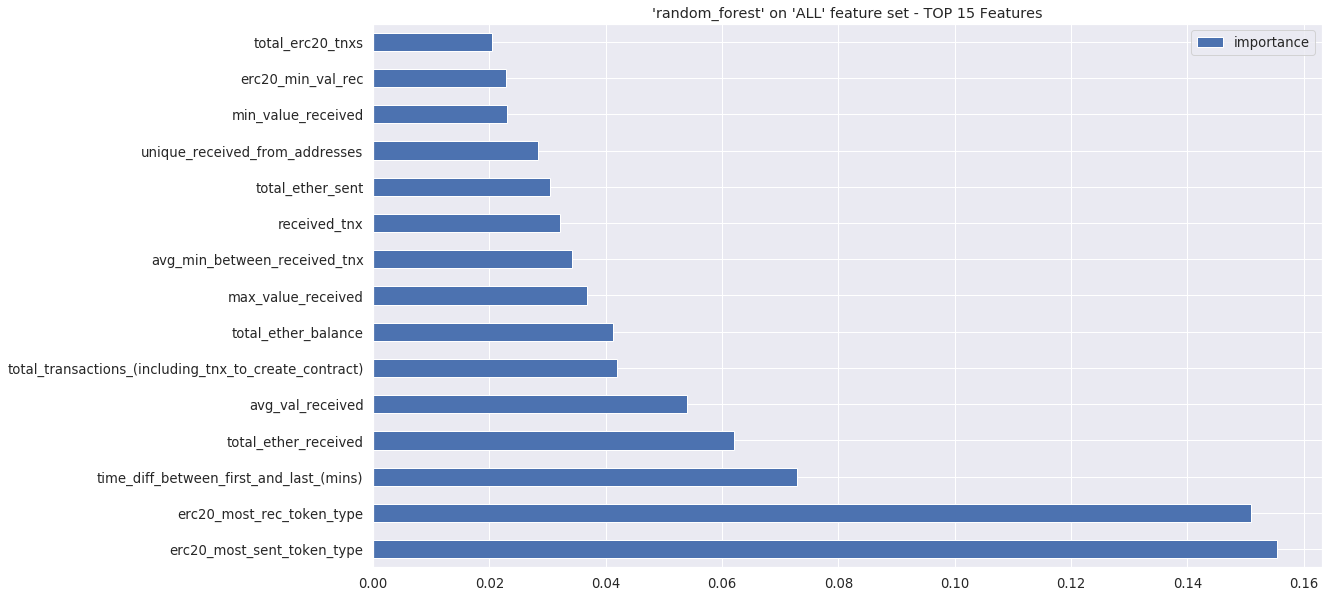

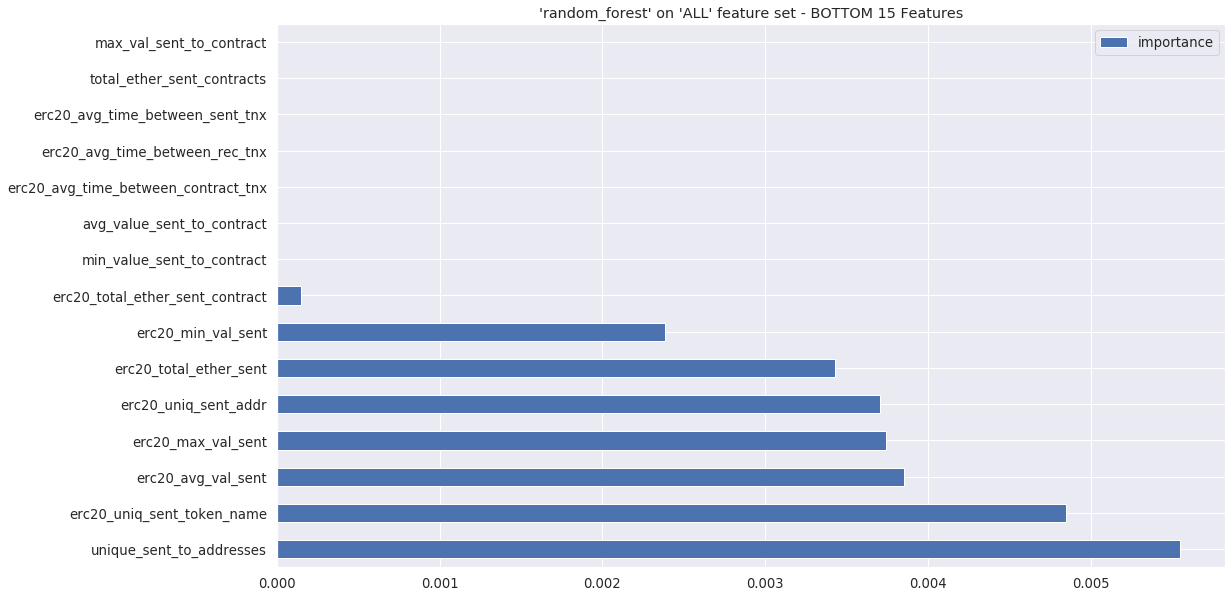

In [6]:
plot_feature_imp(benchmark_results, N_features)

<a id='benchmark_rf_default_hyper'></a>
#### RF Default Hyperparameters - Hyperparameters

In [7]:
print_model_params(benchmark_results)

Parameters used for 'random_forest' on 'ALL' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'auto',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_jobs': 120,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


### RF - Tuned Hyperparameters 

In [8]:
benchmark_tuned_results = read_pickle(BENCHMARK_TUNED_RESULTS)

####  RF Tuned Hyperparameters - Evaluation Metrics
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [9]:
print("Performance metrics for RF benchmark model with tuned hyperparameters")
benchmark_tuned_metrics_df = results_table(benchmark_tuned_results)
display(benchmark_tuned_metrics_df)

Performance metrics for RF benchmark model with tuned hyperparameters


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_ALL,0.983,0.961,0.974,0.974,0.973,0.972


#### RF Tuned Hyperparameters - Evaluation Statistics

<i>Note: Since random forest is non-deterministic in nature, we ran the model for 100 iterations and averaged the results. This was done to insure robustness and was also recommended in previous studies.<i/>
    
Below we show statistics for the evaluation metrics.

'random_forest' on 'ALL' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.982827,0.960734,0.973907,0.973907,0.973057,0.971654
std,29.011492,0.001697,0.002049,0.001292,0.001292,0.001317,0.001411
min,0.000000,0.979688,0.955657,0.970819,0.970819,0.969839,0.968242
25%,24.750000,0.981250,0.958716,0.972954,0.972954,0.972108,0.970622
50%,49.500000,0.982786,0.960245,0.973665,0.973665,0.972898,0.971429
75%,74.250000,0.984326,0.961774,0.975089,0.975089,0.974155,0.972900
max,99.000000,0.987441,0.966361,0.976512,0.976512,0.975857,0.974557


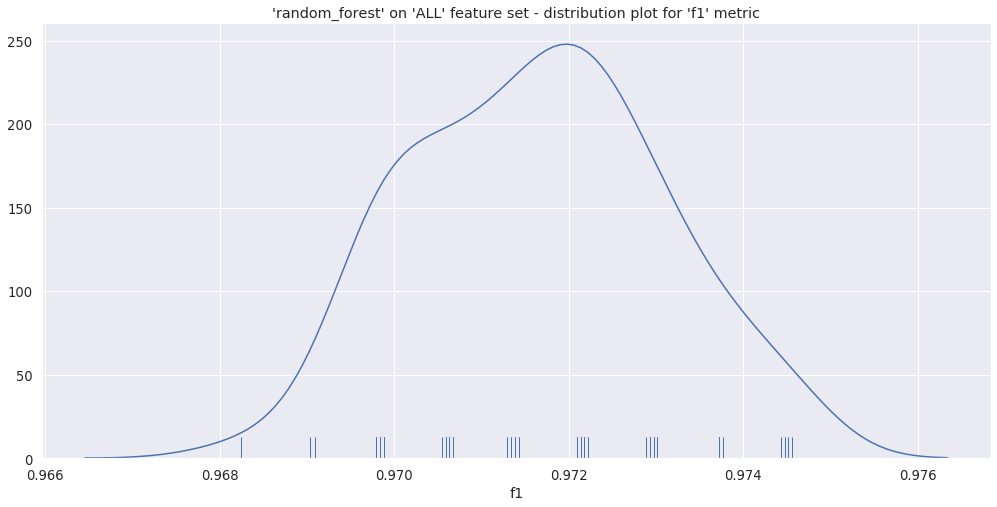

In [10]:
display_metrics_stats(benchmark_tuned_results)
plot_metric_dist(benchmark_tuned_results, "f1", figsize=(17,8))

####  RF Tuned Hyperparameters - Confusion Matrix

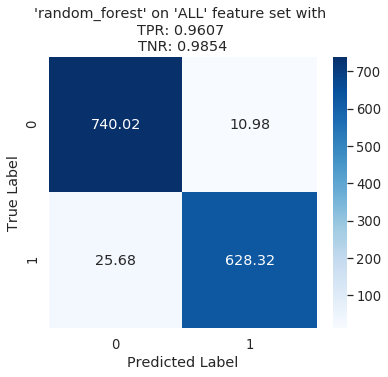

In [11]:
plot_result_matrices(benchmark_tuned_results, figsize=(6,5))

####  RF Tuned Hyperparameters - Feature Importance 

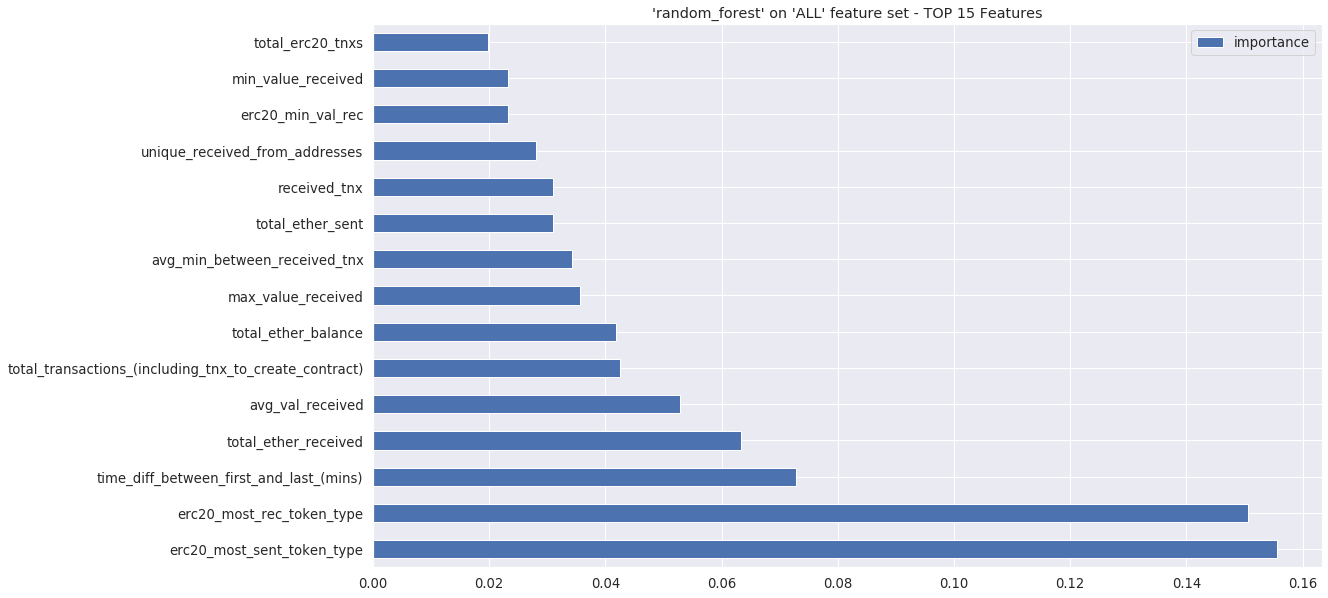

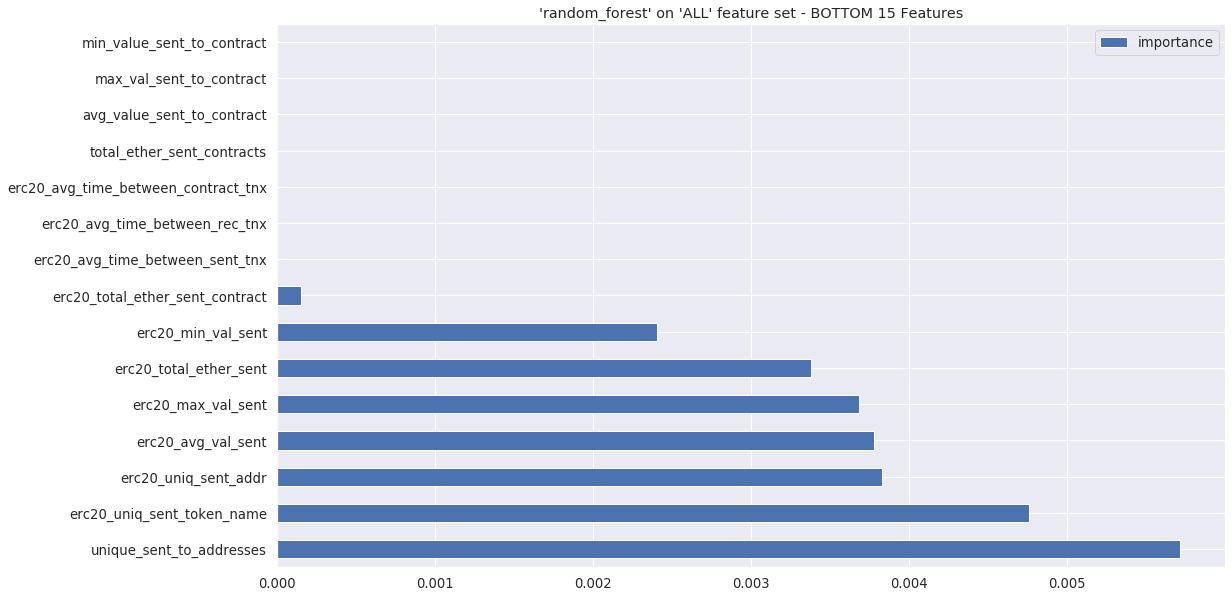

In [12]:
plot_feature_imp(benchmark_tuned_results, N_features)

#### RF Tuned Hyperparameters - Hyperparameters

In [13]:
print_model_params(benchmark_tuned_results)

Parameters used for 'random_forest' on 'ALL' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': 0.9989555808064626,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 750,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


### XGBoost - Suggested Hyperparameters 

In [14]:
benchmark_xgb_results = read_pickle(BENCHMARK_XGB_RESULTS)

For the sake of completeness, we apply the suggested hyperparameters in the original paper, even though it uses a different evaluation technique (data is not split 70/30).

- learning_rate: 0.2
- n_estimators: 150
- max_depth: 4

####  XGBoost Suggested Hyperparameters  - Evaluation Metrics
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [15]:
print("Performance metrics for XGB benchmark model with suggested hyperparameters")
benchmark_xgb_metrics_df = results_table(benchmark_xgb_results)
display(benchmark_xgb_metrics_df)

Performance metrics for XGB benchmark model with suggested hyperparameters


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.988,0.971,0.981,0.981,0.98,0.979


####  XGBoost Suggested Hyperparameters  - Confusion Matrix

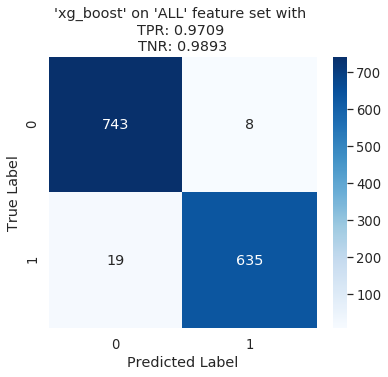

In [16]:
plot_result_matrices(benchmark_xgb_results, figsize=(6,5))

####  XGBoost Suggested Hyperparameters - Feature Importance 

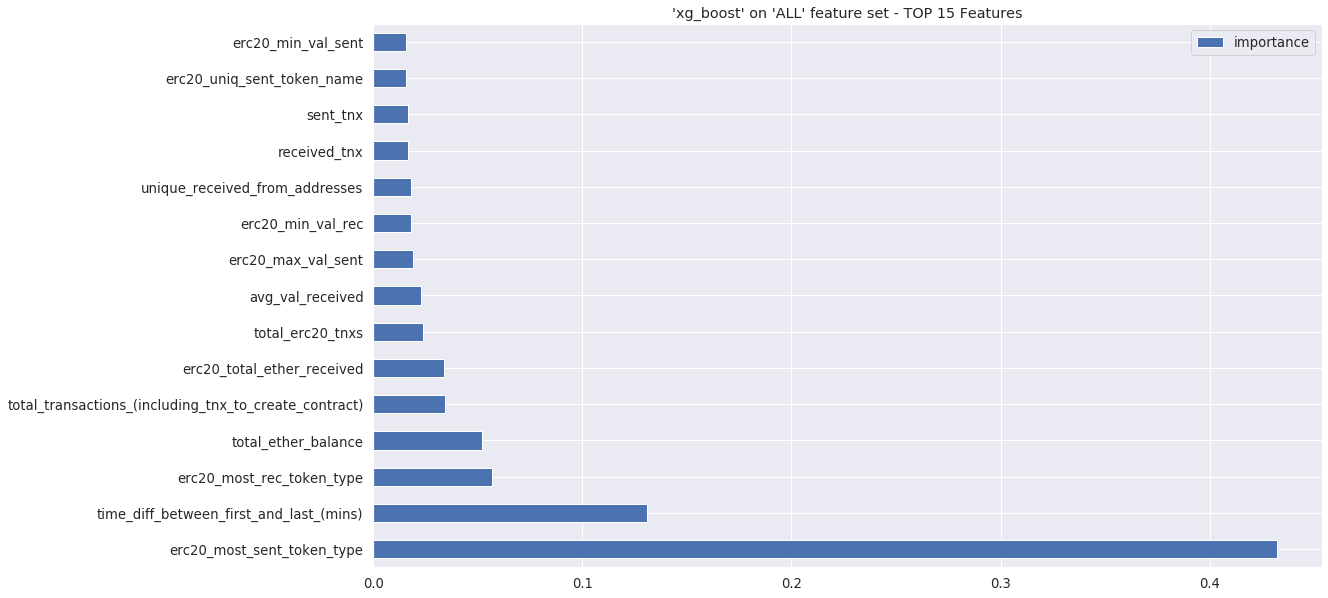

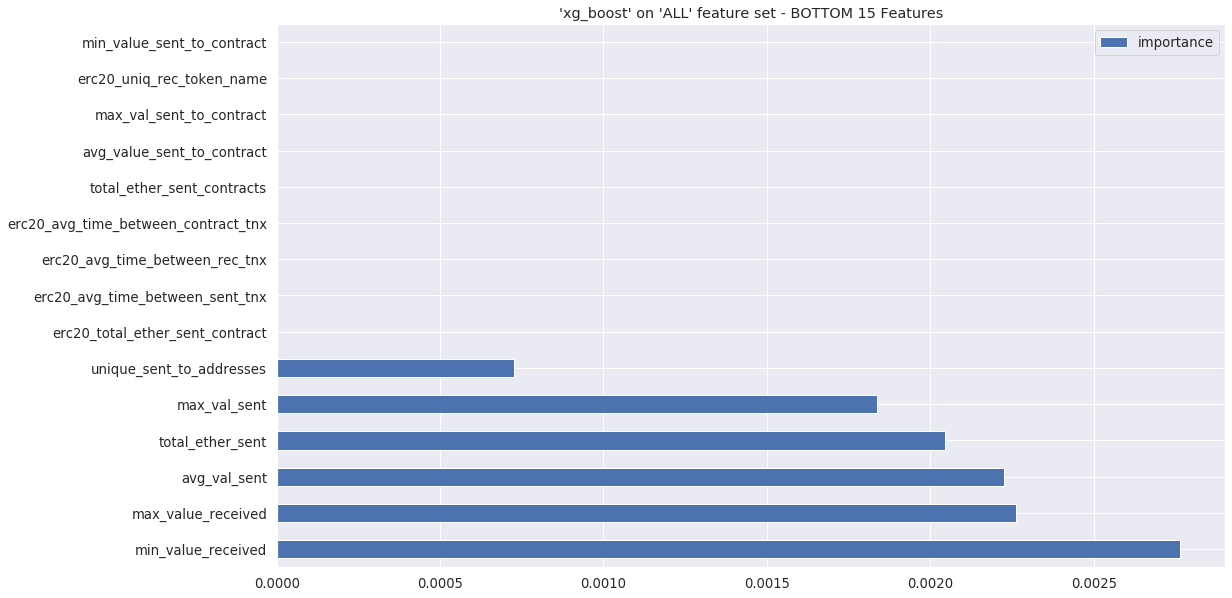

In [17]:
plot_feature_imp(benchmark_xgb_results, N_features)

#### XGBoost Suggested Hyperparameters  - Hyperparameters

In [18]:
print_model_params(benchmark_xgb_results)

Parameters used for 'xg_boost' on 'ALL' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.2,
    'max_delta_step': 0,
    'max_depth': 4,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 150,
    'n_jobs': 120,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


## Boosting Algorithms
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/) 

### Boosting Algorithms - Default Hyperparameters 

In [19]:
default_results = read_pickle(DEFAULT_RESULTS)

#### Boosting Default Hyperparameters - Evaluation Metrics
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [20]:
print("Performance metrics for Boosting Algorithms with default hyperparameters")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

print("Performance metrics for Boosting Algorithms with default hyperparameters, sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for Boosting Algorithms with default hyperparameters


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.989,0.969,0.981,0.981,0.980,0.979
1,light_boost_ALL,0.984,0.968,0.978,0.978,0.977,0.976
2,cat_boost_ALL,0.980,0.977,0.980,0.980,0.980,0.979


Performance metrics for Boosting Algorithms with default hyperparameters, sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.989,0.969,0.981,0.981,0.980,0.979
2,cat_boost_ALL,0.980,0.977,0.980,0.980,0.980,0.979
1,light_boost_ALL,0.984,0.968,0.978,0.978,0.977,0.976


#### Boosting Default Hyperparameters - Confusion Matrices

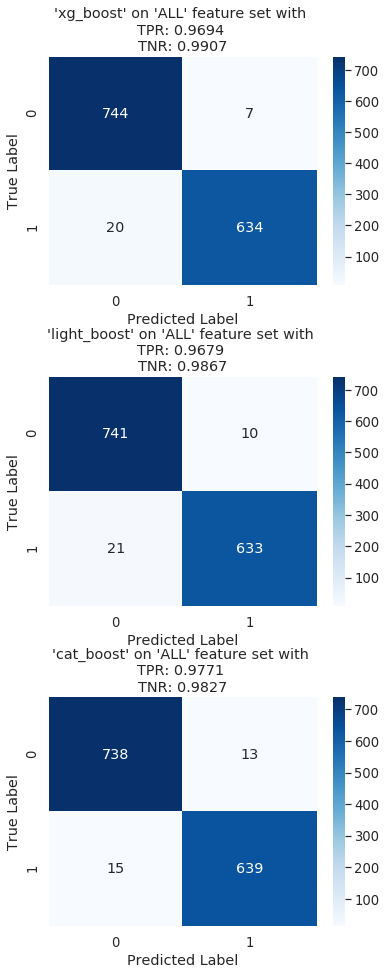

In [21]:
plot_result_matrices(default_results, figsize=(6,16), columns=1)

#### Boosting Default Hyperparameters - Feature Importance 

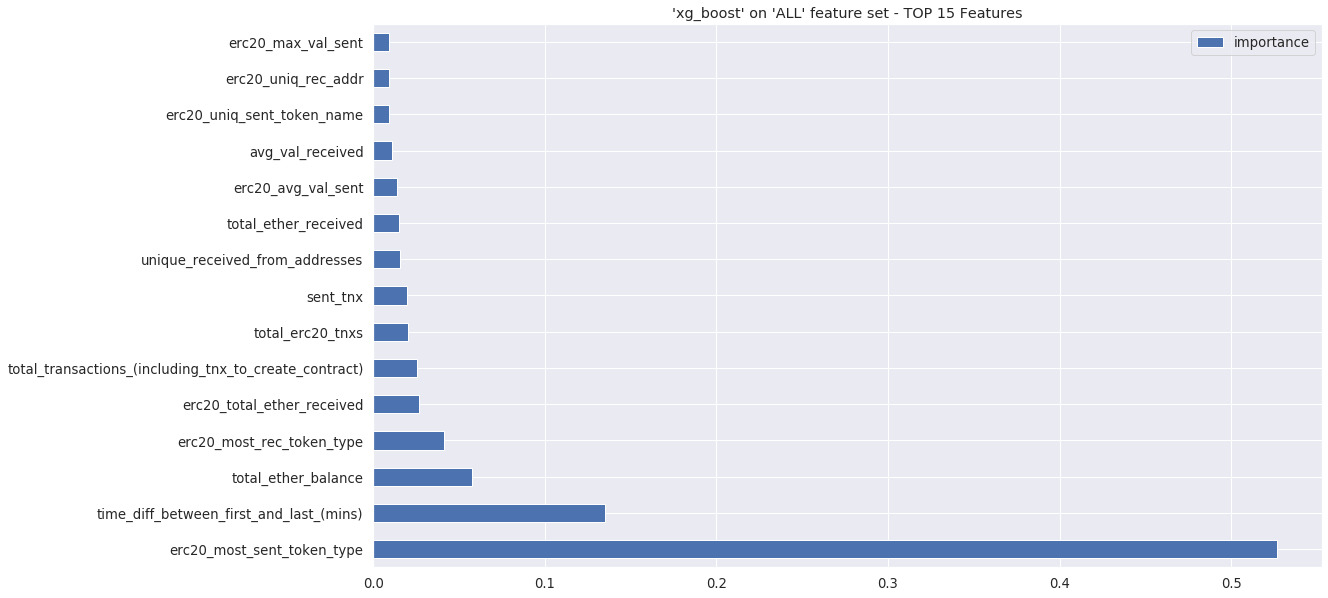

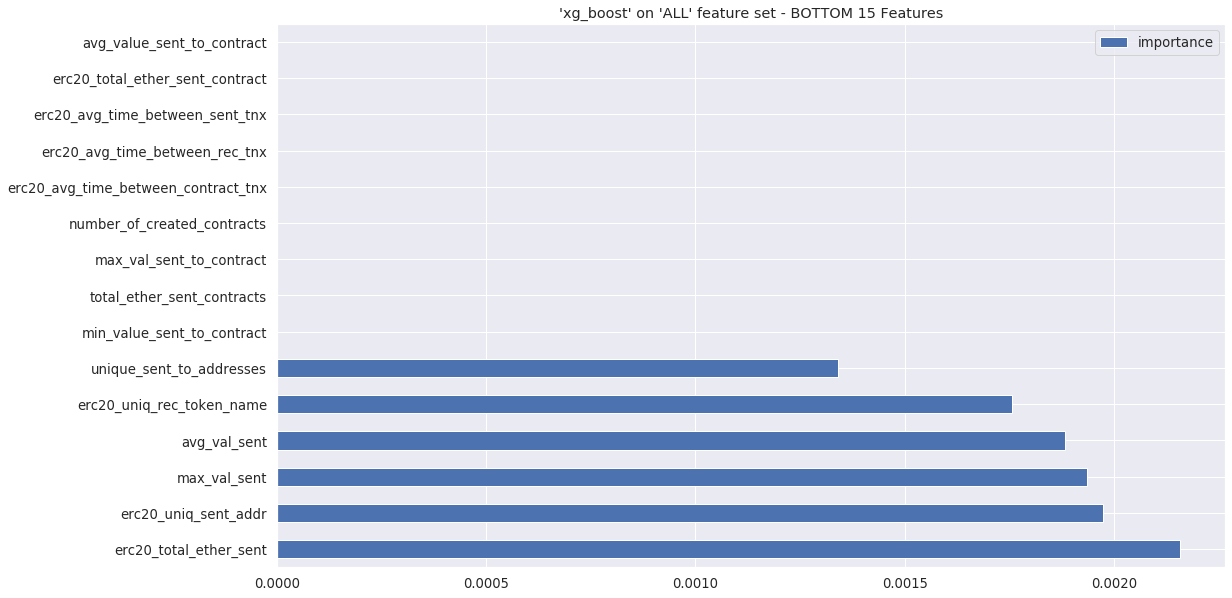

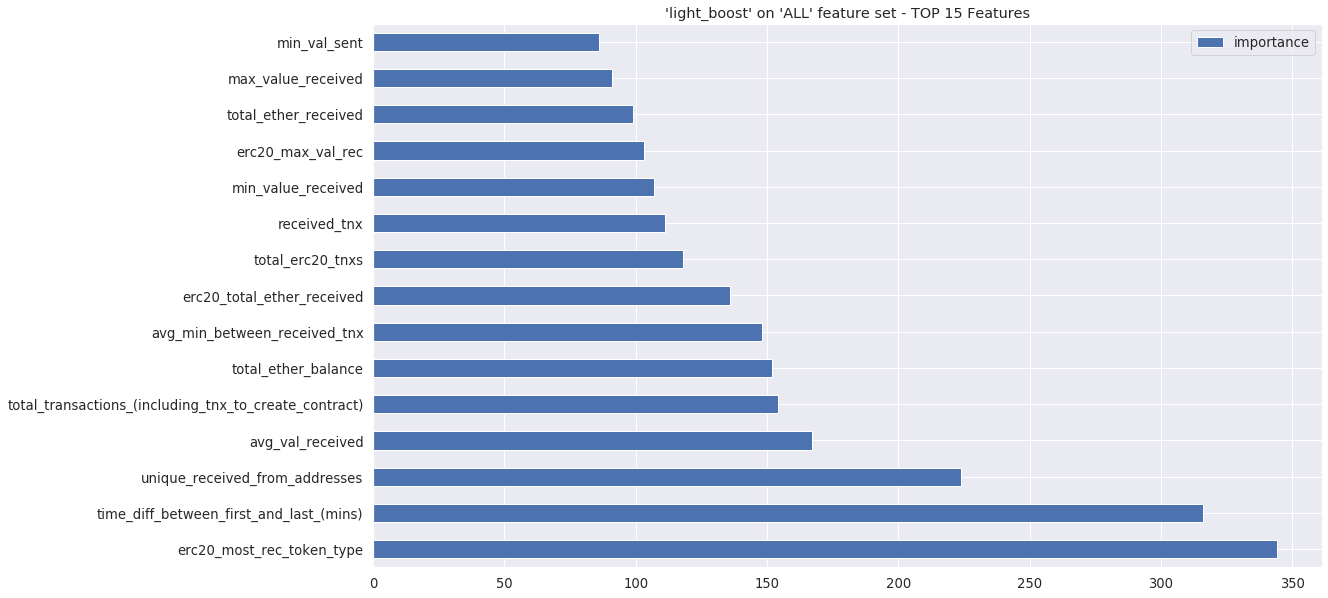

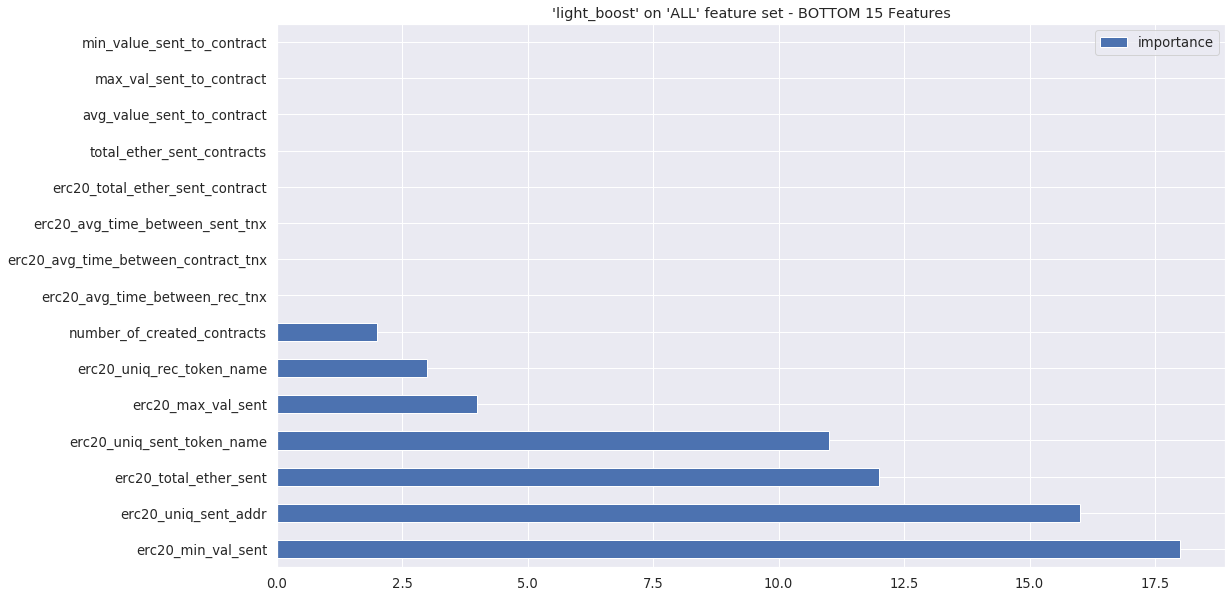

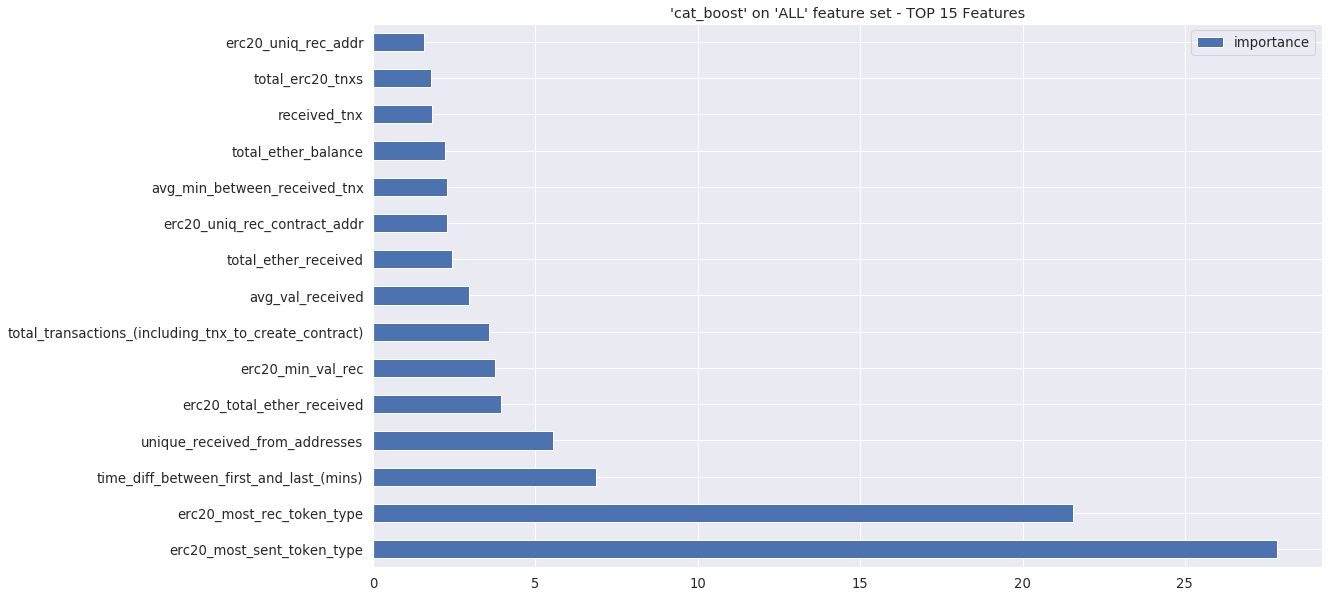

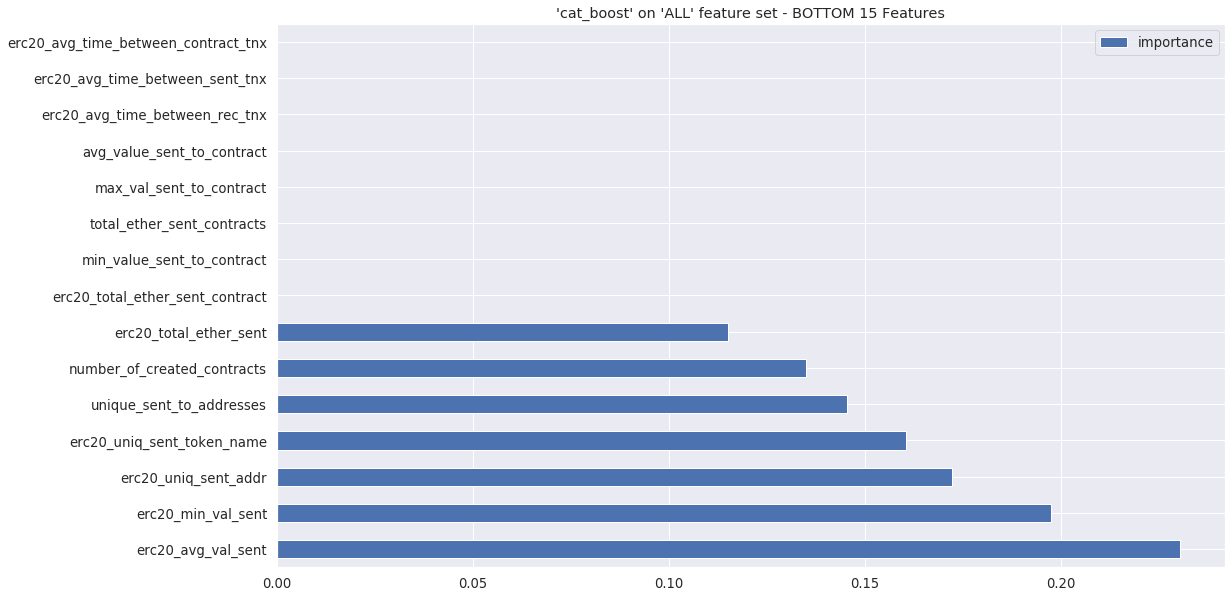

In [22]:
plot_feature_imp(default_results, N_features, figsize=(17,10))

#### Boosting Default Hyperparameters - Hyperparameters

In [23]:
print_model_params(default_results)

Parameters used for 'xg_boost' on 'ALL' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'ALL' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'cat_boost' on 'ALL' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.017100000753998756,
    'loss_function': 'Logloss',
    'max_leaves': 64,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosi

### Boosting Algorithms - Tuned Hyperparameters 

In [24]:
tuned_results = read_pickle(TUNED_RESULTS)

#### Boosting Tuned Hyperparameters - Evaluation Metrics
- Precision 
- Recall 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- <i>AUC</i>
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [25]:
# dataframe with all the perfomance metrics
print("Performance metrics for tuned boosting models")
tuned_metrics_df = results_table(tuned_results)
display(tuned_metrics_df)

# sorted by f1 score
print("Performance metrics for tuned boosting models sorted by f1-score")
display(tuned_metrics_df.sort_values("f1", ascending=False))

Performance metrics for tuned boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.985,0.981,0.984,0.984,0.984,0.983
1,light_boost_ALL,0.983,0.977,0.981,0.981,0.981,0.980
2,cat_boost_ALL,0.981,0.977,0.980,0.980,0.980,0.979


Performance metrics for tuned boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_ALL,0.985,0.981,0.984,0.984,0.984,0.983
1,light_boost_ALL,0.983,0.977,0.981,0.981,0.981,0.980
2,cat_boost_ALL,0.981,0.977,0.980,0.980,0.980,0.979


#### Boosting Tuned Hyperparameters - Confusion Matrices

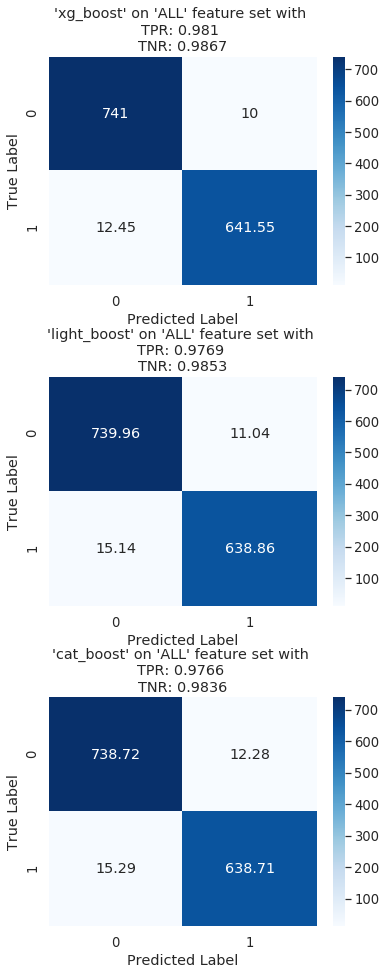

In [26]:
plot_result_matrices(tuned_results, figsize=(6,16), columns=1)

#### Boosting Tuned Hyperparameters - Feature Importance 

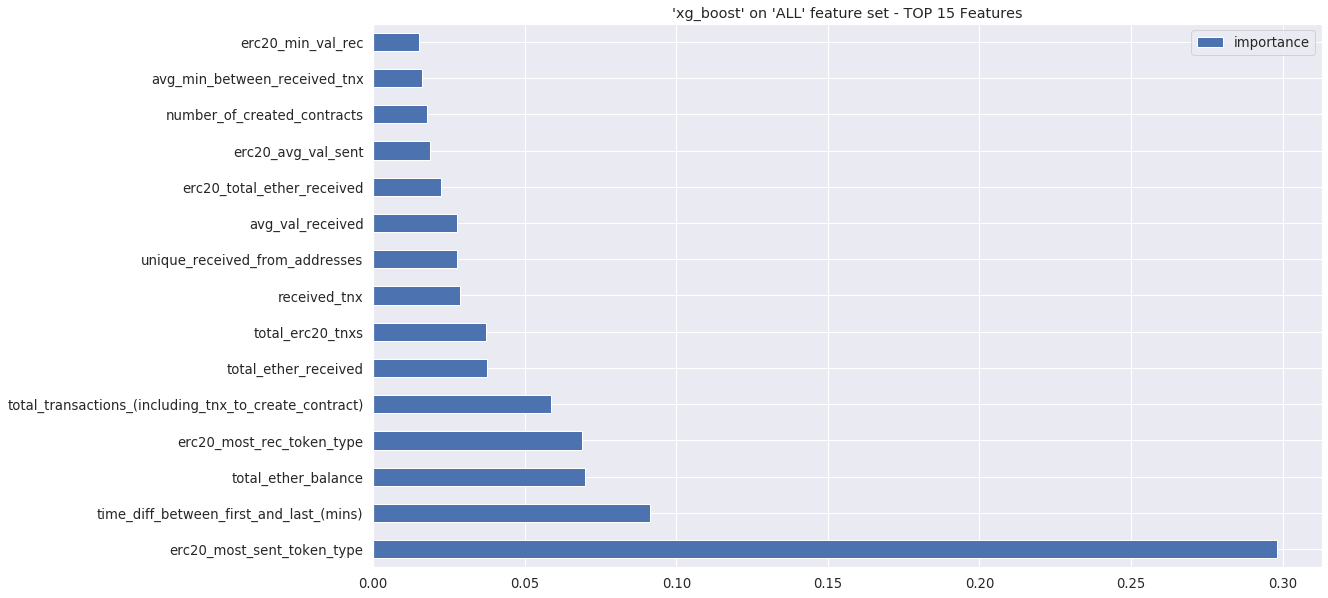

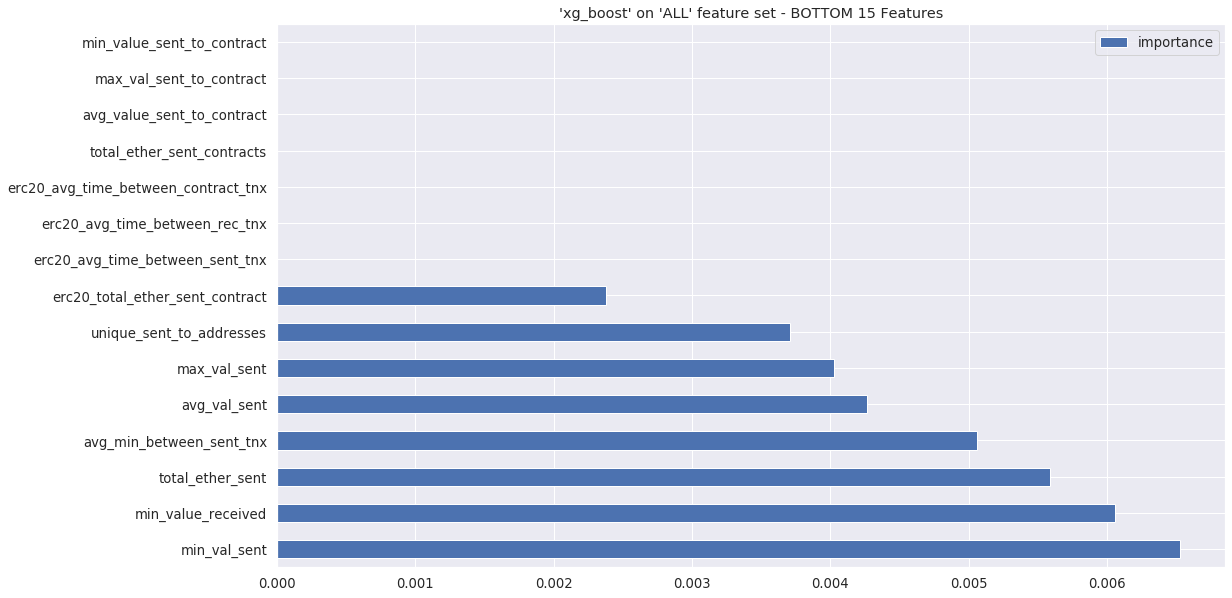

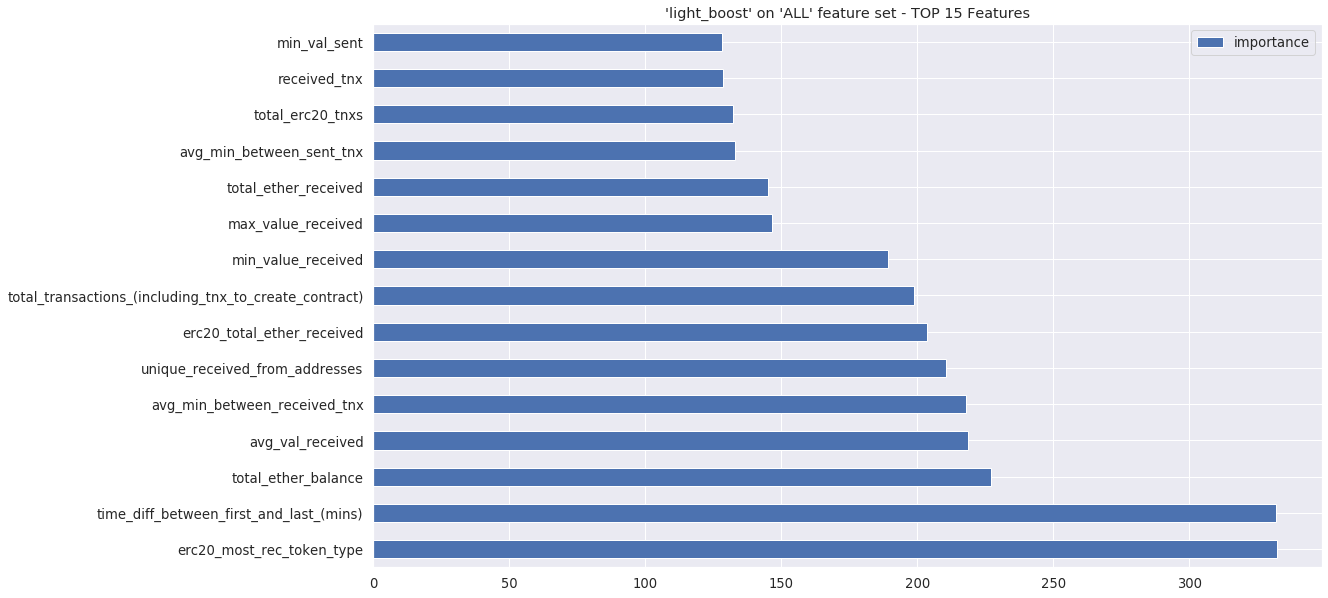

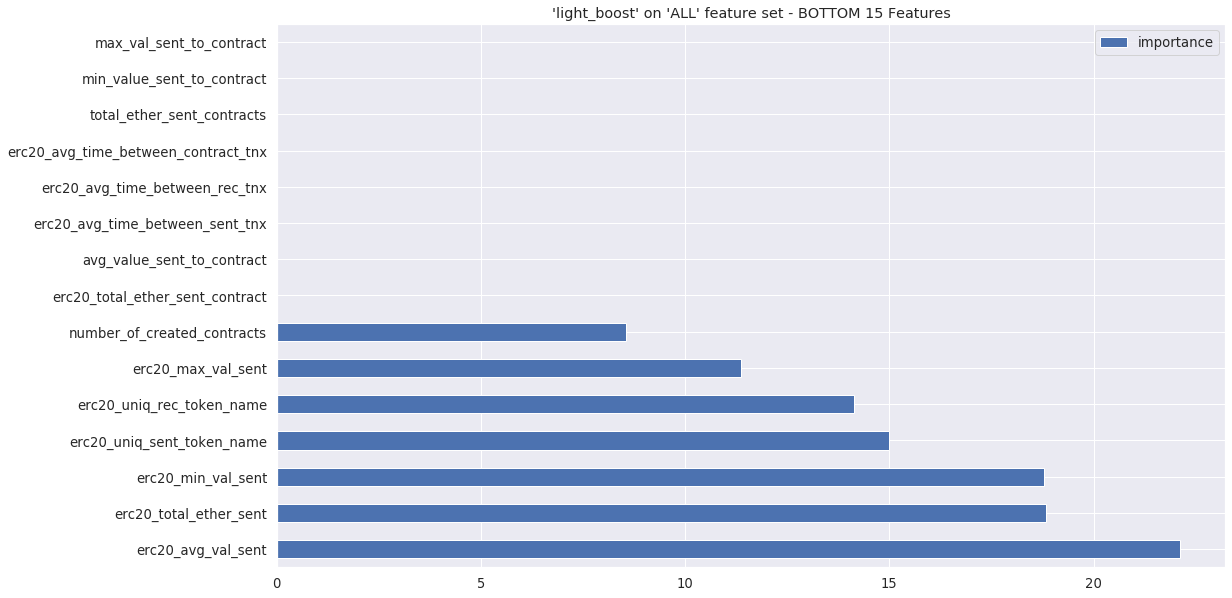

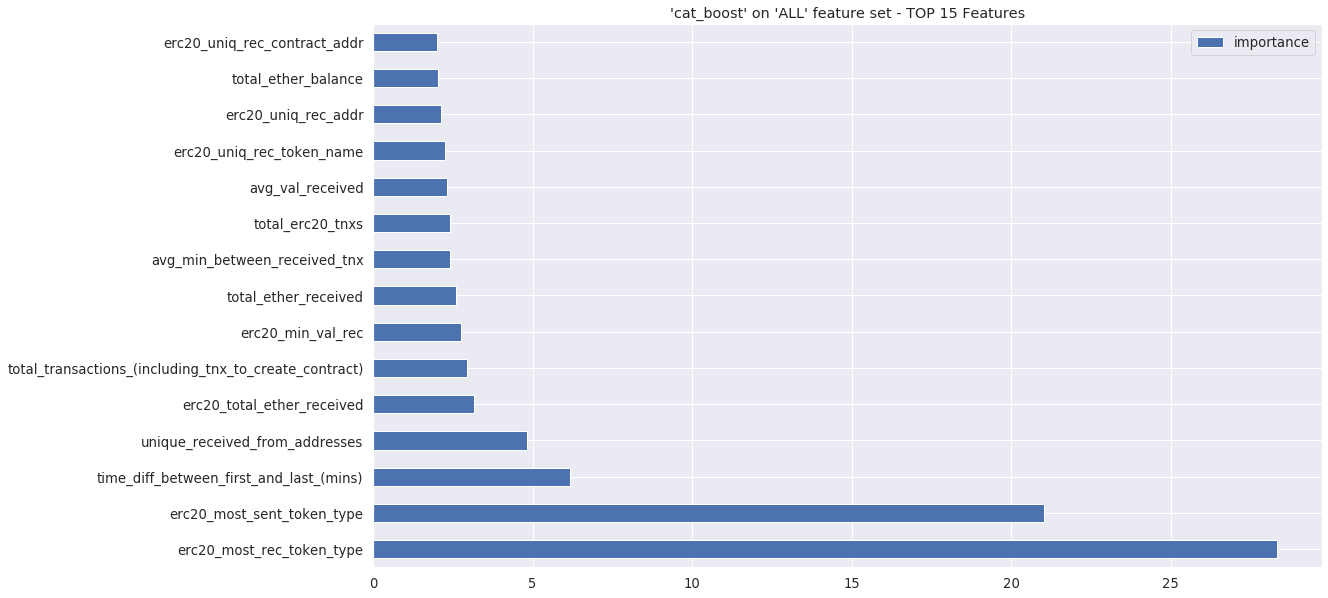

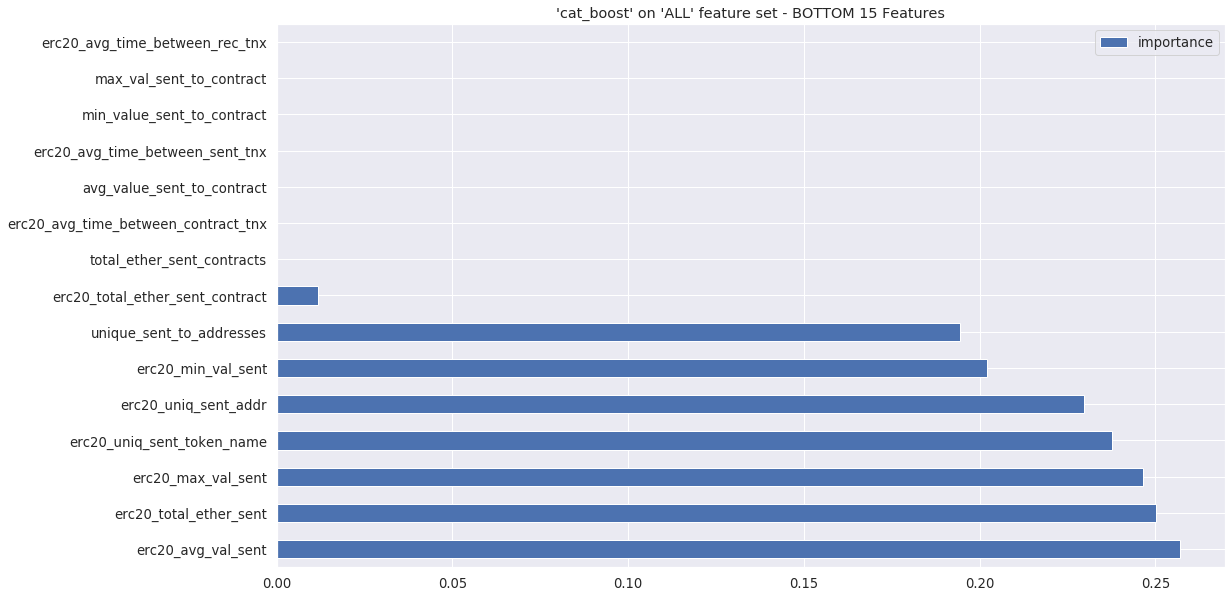

In [27]:
plot_feature_imp(tuned_results, N_features, figsize=(17,10))

#### Boosting Tuned Hyperparameters - Hyperparameters

In [28]:
print_model_params(tuned_results)

Parameters used for 'xg_boost' on 'ALL' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 0.8150557185716437,
    'colsample_bynode': 1,
    'colsample_bytree': 0.9055926731831192,
    'gamma': 0.035718743636794725,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.07853386099915022,
    'max_delta_step': 0,
    'max_depth': 3,
    'min_child_weight': 6.543265212724884e-05,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 431,
    'n_jobs': 0,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 1.3075090623870832e-07,
    'reg_lambda': 0.0012272847930438772,
    'scale_pos_weight': 1,
    'subsample': 0.6788149328377757,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'ALL' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.7779646637843973,
    'importance_type': 'split',
    'learning_rate': 0.19232892325747805,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.0001519376996130637,
    'min_split_gain': 0.0,
    'n_estimators': 122,
    'n_jobs': -1,
    'num_leaves': 693,
    'objective': None,
    'random_state': 0,
    'reg_alpha': 0.0007499216305329894,
    'reg_lambda': 2.3537581461084842e-05,
    'silent': True,
    'subsample': 0.7061136386427012,
    'subsample_for_bin': 200000,
    'subsample_freq': 1}


Parameters used for 'cat_boost' on 'ALL' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 5,
    'eval_metric': 'F1',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 130,
    'l2_leaf_reg': 2.0280065536499023,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 6,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.11969946324825288,
    'loss_function': 'Logloss',
    'max_leaves': 32,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 2,
    'rsm': 0.2849999964237213,
    'sampling_frequency': 'PerTree',
 

#### Box Plots

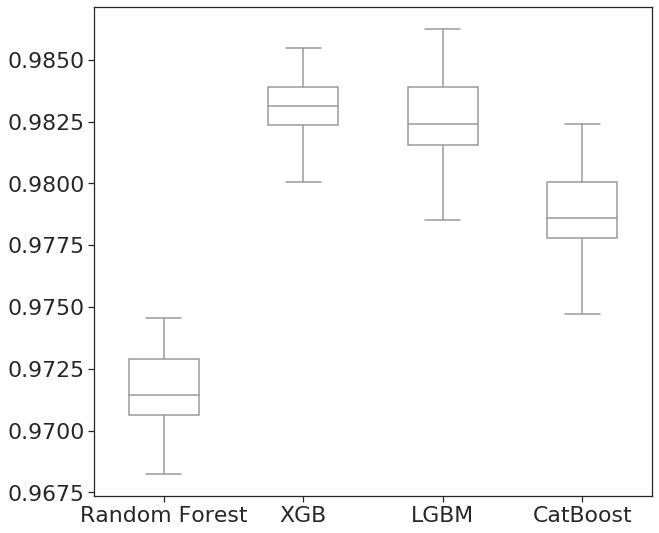

In [29]:
rf_f1_scores = benchmark_tuned_results["random_forest"]["ALL"]["metrics_iterations"]["f1"].values
xgb_f1_scores = tuned_results["xg_boost"]["ALL"]["metrics_iterations"]["f1"].values
lgbm_f1_scores = tuned_results["light_boost"]["ALL"]["metrics_iterations"]["f1"].values
cat_f1_scores = tuned_results["cat_boost"]["ALL"]["metrics_iterations"]["f1"].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
f1_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
                      showfliers=False,
            width=.5, 
            fliersize=0)
f1_plot.figure.savefig("exp1_elliptic_boxplot_f1.png")

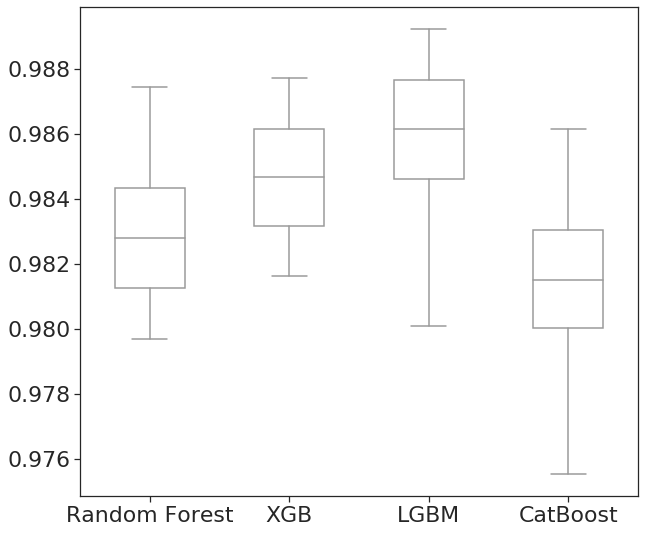

In [30]:
rf_f1_scores = benchmark_tuned_results["random_forest"]["ALL"]["metrics_iterations"]["precision"].values
xgb_f1_scores = tuned_results["xg_boost"]["ALL"]["metrics_iterations"]["precision"].values
lgbm_f1_scores = tuned_results["light_boost"]["ALL"]["metrics_iterations"]["precision"].values
cat_f1_scores = tuned_results["cat_boost"]["ALL"]["metrics_iterations"]["precision"].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
precision_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
                                                   showfliers=False,

            width=.5, 
            fliersize=0)
precision_plot.figure.savefig("exp1_elliptic_boxplot_precision.png")

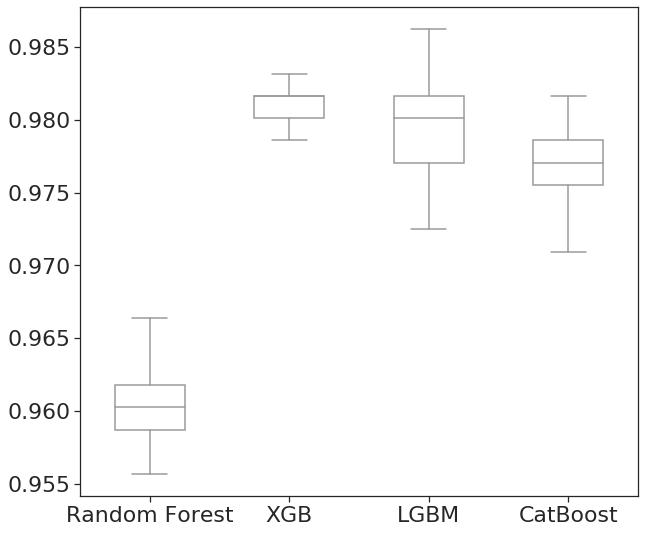

In [31]:
rf_f1_scores = benchmark_tuned_results["random_forest"]["ALL"]["metrics_iterations"]["recall"].values
xgb_f1_scores = tuned_results["xg_boost"]["ALL"]["metrics_iterations"]["recall"].values
lgbm_f1_scores = tuned_results["light_boost"]["ALL"]["metrics_iterations"]["recall"].values
cat_f1_scores = tuned_results["cat_boost"]["ALL"]["metrics_iterations"]["recall"].values

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(style="ticks", font_scale=2)
plt.figure(figsize=(10,9))
recall_plot = sns.boxplot(y=[rf_f1_scores, xgb_f1_scores, lgbm_f1_scores, cat_f1_scores], 
            x=["Random Forest", "XGB", "LGBM", 'CatBoost'],  
            color='white', 
            orient="v",
                                                showfliers=False,

            width=.5, 
            fliersize=0)
recall_plot.figure.savefig("exp1_elliptic_boxplot_recall.png")